In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

from sklearn.preprocessing import LabelEncoder

In [3]:
#Load Dataset csv melalui drive dan tampilkan data statistik nya
dataset = pd.read_csv('/content/drive/My Drive/Datasets/ionosphere_data_kaggle.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [4]:
#Fungsi yang digunakan untuk melihat sejumlah informasi seperti jumlah data perkolom dan type data nya
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [5]:
#Fungsi untuk menampilkan beberapa data awal, dsni saya gunakan untuk melihat 10 data awal
dataset.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,0.79766,-0.47929,0.78225,-0.50764,0.74628,-0.61436,0.57945,-0.68086,0.37852,-0.73641,0.36324,-0.76562,0.31898,-0.79753,0.22792,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,0.92570,-0.43569,0.94510,-0.40668,0.90392,-0.46381,0.98305,-0.35257,0.84537,-0.66020,0.75346,-0.60589,0.69637,-0.64225,0.85106,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f636387ba58>,
      dtype=object)

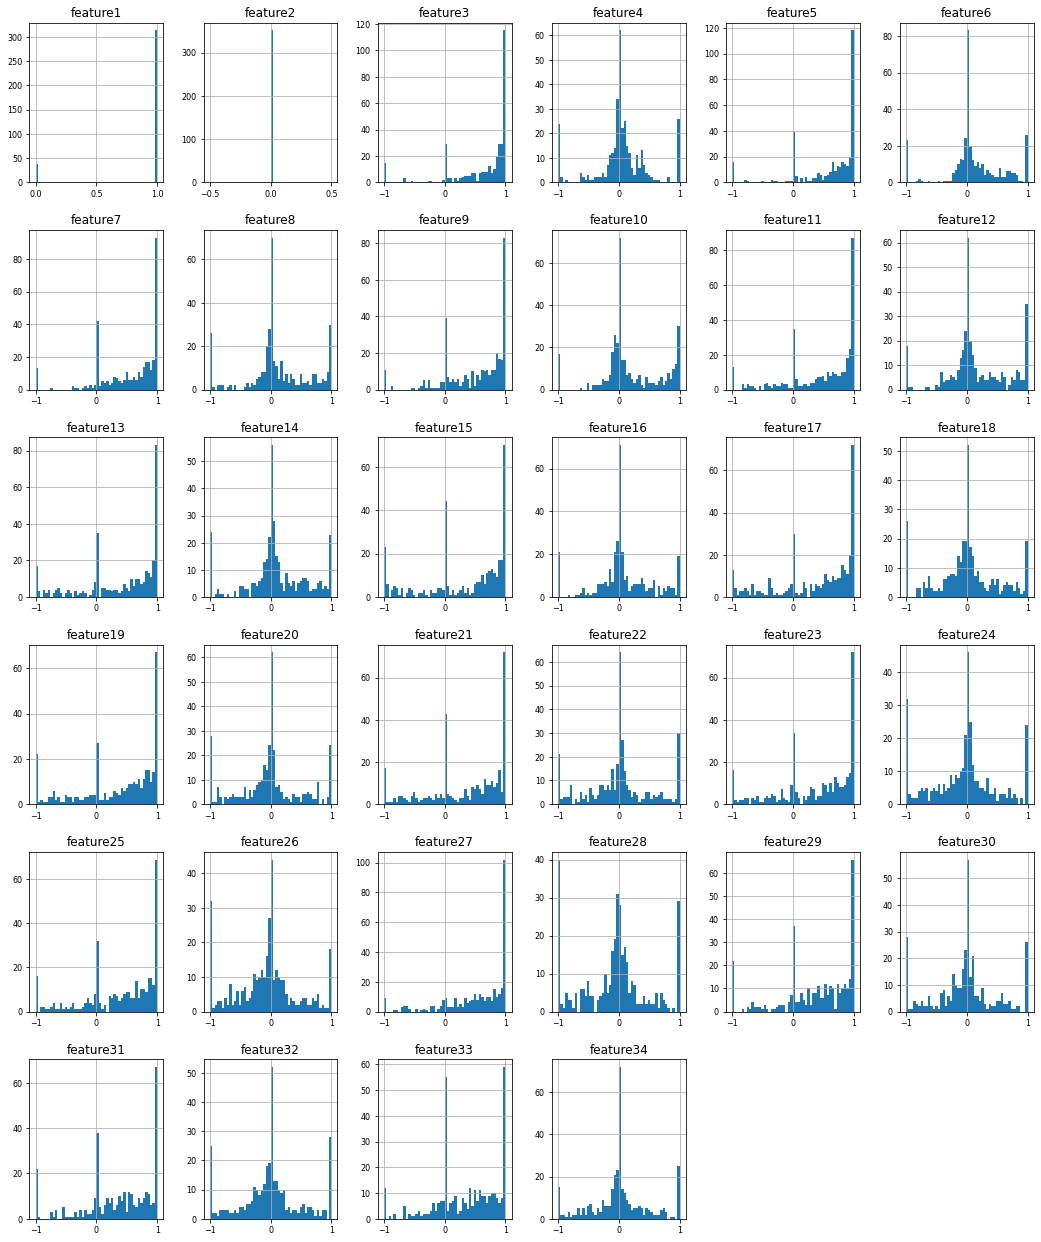

In [6]:
#Dsini kita mencoba melihat histogram pada setiap feature
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

Pada feature 2 kita lihat histogram nya hanya menunjukkan 1 diagram batang

# Corelation

In [7]:
#Untuk melihat korelasi antar feature nya
corr = dataset.corr()

corr

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
feature1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.221867,0.027079,0.189242,-0.051883,0.034138,0.072216,0.102558,0.199230,0.113622,0.100474,0.057783,0.076019,0.200237,0.019230,0.173828,-0.153902,0.011772,-0.082586,0.016717,0.149789,-0.203100,-0.010725,0.133632,-0.121415,0.167031,-0.100914,0.162962,0.010788
feature2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,0.325016,0.169981,0.217597,0.164550,0.198306,0.094301,0.221446,0.172002,0.285280,0.150800,0.149374,0.138065,0.250832,-0.012570,0.304898,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584
feature4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,-0.190090,0.315877,-0.149216,0.236604,-0.253150,0.185872,-0.251143,-0.147451,-0.332213,0.167244,-0.281084,-0.035401,-0.143719,0.164196,-0.104632,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608
feature5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,0.449829,0.042896,0.482118,0.127217,0.398878,0.087992,0.277932,0.027588,0.221532,0.041959,0.326223,0.163663,0.502878,0.098274,0.243063,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478
feature6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,-0.291447,0.163933,-0.307197,0.135206,-0.359342,0.157740,-0.316705,0.188073,-0.208571,-0.061261,-0.114966,-0.132422,-0.215778,-0.286541,-0.177576,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215
feature7,0.221867,NaN,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,0.412876,-0.020395,0.631060,0.083657,0.615407,-0.021493,0.379737,0.115927,0.372572,0.158917,0.586627,0.190805,0.373186,0.112717,0.286749,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460
feature8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,-0.364003,0.429146,-0.355875,0.253740,-0.352216,0.419673,-0.491863,0.068717,-0.400523,0.077624,-0.370473,-0.212007,-0.270624,0.007045,-0.179928,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610
feature9,0.189242,NaN,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,0.670813,-0.167705,0.562072,-0.088988,0.618461,-0.032689,0.633574,0.200786,0.673490,0.067314,0.492411,0.237322,0.352218,0.161258,0.356564,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597
feature10,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,-0.337374,0.441505,-0.406358,0.323813,-0.374908,0.334135,-0.392047,0.130752,-0.471665,-0.001418,-0.404818,-0.040414,-0.318463,0.101850,-0.254785,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104


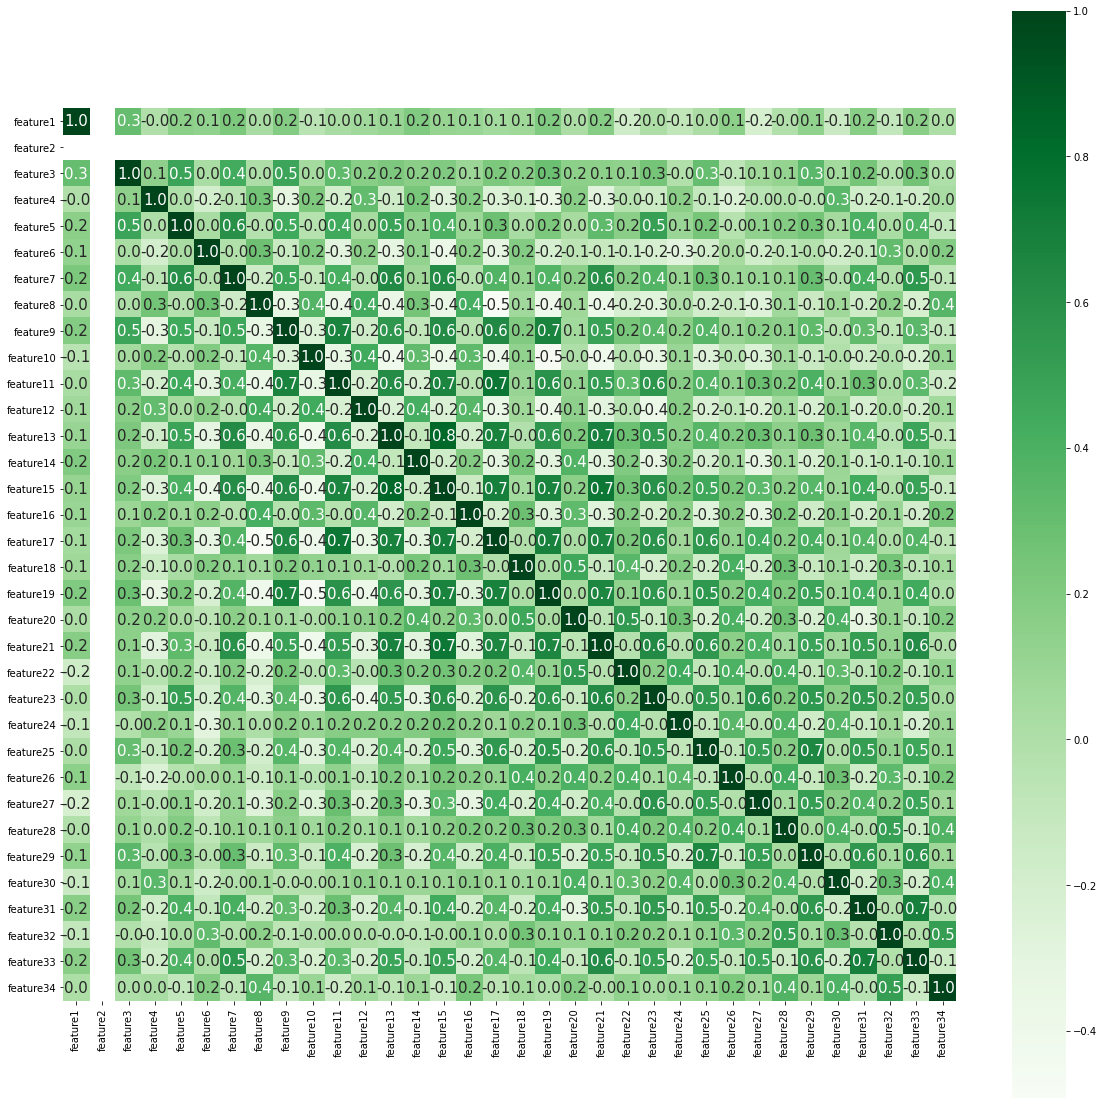

In [8]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

Pada plot diatas kita lihat feature2 memang tidak ada korelasi nya sama sekali jadi bisa kita drop untuk feature2

# Feature Engineering

In [9]:
dataset = dataset.drop(['feature2'], axis=1)

Disini saya melakukan data cleaning pada kolom 'label' karena data nya bertype string, isi dari kolom label tersebut yaitu 'g' dan 'b' , disini saya mengganti nilai 'g' dengan 1 dan 'b' dengan 0

In [10]:
cleanup_label = {
    'label':{
        'g': 1,
        'b' : 0
    } 
}

dataset.replace(cleanup_label, inplace=True)

In [11]:
dataset.head(5)

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [32]:
label = dataset['label']
features = dataset.drop(['label'], axis=1)

# Preprocessing

In [33]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() #preprocessing menggunakan standard scaler 

features_scaled = scaler.fit_transform(features.values)

In [34]:
from sklearn.model_selection import train_test_split

#split dataset
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label, test_size=0.2, random_state=10)

# Deep Learning

Pada Setiap Model dibawah saya menggunakan Epoch 100 dan batch size nya 15

In [47]:
model = Sequential() #masih dengan model sequential
model.add(Dense(24, input_dim=33, kernel_initializer='normal', activation='relu')) # 24 neuron, dan input_dim dengan 33 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='SGD') #disini untuk loss nya menggunakan metrics MSE dan optimizer SGD

In [48]:
history = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5105 - val_loss: 0.4235
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3391 - val_loss: 0.3069
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2639 - val_loss: 0.2439
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2213 - val_loss: 0.2091
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1932 - val_loss: 0.1849
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1714 - val_loss: 0.1664
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1528
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.1427
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1259 - val_loss: 0.1350
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1161 - val_loss: 0.1293
Epoch 11/

In [49]:
#menampilkan hasil evaluasi dari model
loss = model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

3/3 - 0s - loss: 0.0753
Test loss: 0.0752776563167572


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.07527765112130978
MAE (Mean Absolute Error) 0.18547133786577574
r^2 score 0.6562729716462659
RMSE (Root Mean Squared Error 0.2743677297374999


In [50]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [55]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=False)

,loss,val_loss,epoch
0,0.510505,0.423498,0
1,0.339115,0.306854,1
2,0.263876,0.243866,2
3,0.221268,0.209051,3
4,0.193243,0.184941,4
...,...,...,...
95,0.039240,0.076278,95
96,0.038988,0.075959,96
97,0.038724,0.075937,97
98,0.038577,0.075352,98


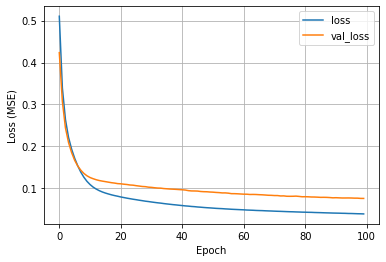

In [56]:
plot_loss(history) # epoch vs loss graph

# Deeper Model

In [46]:
deeper_model = Sequential()
deeper_model.add(Dense(32, input_dim=33, kernel_initializer='normal', activation='relu')) # layer pertama menggunakan 32 neuron activation relu
deeper_model.add(Dense(8, kernel_initializer='normal', activation='relu')) #layer kedua menggunakan 8 neuron
deeper_model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy']) #disini untuk loss nya menggunakan metrics MSE dan optimizer SGD

history = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
19/19 [==============================] - 0s 7ms/step - loss: 0.2495 - accuracy: 0.6500 - val_loss: 0.2488 - val_accuracy: 0.6761
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.6321 - val_loss: 0.2477 - val_accuracy: 0.6761
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.6321 - val_loss: 0.2467 - val_accuracy: 0.6761
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.6321 - val_loss: 0.2457 - val_accuracy: 0.6761
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.6321 - val_loss: 0.2448 - val_accuracy: 0.6761
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.6321 - val_loss: 0.2439 - val_accuracy: 0.6761
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.6321 - val_loss: 0.2430 - val_accuracy: 0.6761
Epoch 8/100
1

In [197]:
loss = deeper_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

3/3 - 0s - loss: 0.0854
Test loss: 0.08542696386575699


In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.08542696775281756
MAE (Mean Absolute Error) 0.1914430642631692
r^2 score 0.6099299416286655
RMSE (Root Mean Squared Error 0.29227892115720144


In [189]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.048691,0.085427,99
96,0.049563,0.085432,96
97,0.049212,0.085507,97
98,0.049073,0.085775,98
95,0.049998,0.085804,95
...,...,...,...
4,0.244348,0.234735,4
3,0.259753,0.248774,3
2,0.292215,0.275643,2
1,0.363064,0.328397,1


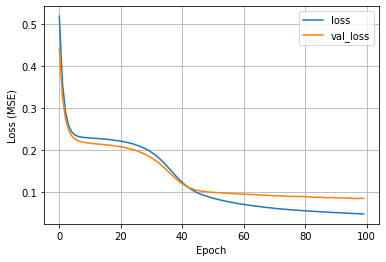

In [190]:
plot_loss(history) # epoch vs loss graph

# Wider Model

In [246]:
wider_model = Sequential()
wider_model.add(Dense(128, input_dim=33, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='SGD')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3587 - val_loss: 0.2392
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1858 - val_loss: 0.1641
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1383 - val_loss: 0.1402
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1151 - val_loss: 0.1284
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1013 - val_loss: 0.1205
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0924 - val_loss: 0.1142
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.1106
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0812 - val_loss: 0.1068
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0773 - val_loss: 0.1036
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0736 - val_loss: 0.1018
Epoch 11/

In [247]:
#menampilkan hasil evaluasi nilai loss dari model
loss = wider_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

3/3 - 0s - loss: 0.0618
Test loss: 0.061840493232011795


In [248]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.06184049862358239
MAE (Mean Absolute Error) 0.1652447761784137
r^2 score 0.7176286652522837
RMSE (Root Mean Squared Error 0.24867749923059462


In [249]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
97,0.021599,0.061020,97
96,0.021744,0.061304,96
93,0.022273,0.061395,93
89,0.023042,0.061519,89
90,0.022853,0.061522,90
...,...,...,...
4,0.101251,0.120524,4
3,0.115054,0.128361,3
2,0.138326,0.140220,2
1,0.185812,0.164124,1


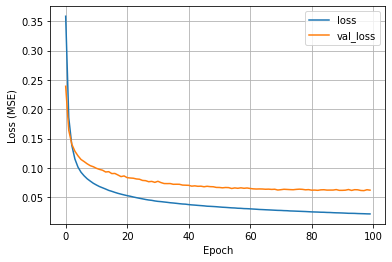

In [250]:
plot_loss(history) # epoch vs loss graph

# SuperWide Model

In [289]:
superwide_model = Sequential()
superwide_model.add(Dense(256, input_dim=33, kernel_initializer='normal', activation='relu'))
superwide_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
superwide_model.compile(loss='mean_squared_error', optimizer=opt)

history = superwide_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4014 - val_loss: 0.1874
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1723 - val_loss: 0.1422
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1272 - val_loss: 0.1278
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1088 - val_loss: 0.1192
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0981 - val_loss: 0.1135
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0878 - val_loss: 0.1099
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0822 - val_loss: 0.1048
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0759 - val_loss: 0.1018
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0719 - val_loss: 0.0978
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0679 - val_loss: 0.0963
Epoch 11/

In [290]:
#menampilkan hasil evaluasi nilai loss dari model
loss = superwide_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

3/3 - 0s - loss: 0.0630
Test loss: 0.06295374780893326


In [291]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = superwide_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.06295374207742678
MAE (Mean Absolute Error) 0.17079223671429594
r^2 score 0.7125454585033439
RMSE (Root Mean Squared Error 0.25090584305158536


In [292]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
75,0.021812,0.061474,75
87,0.019535,0.061575,87
80,0.020693,0.061661,80
66,0.023713,0.061927,66
73,0.021998,0.062037,73
...,...,...,...
4,0.098110,0.113455,4
3,0.108847,0.119249,3
2,0.127200,0.127805,2
1,0.172267,0.142161,1


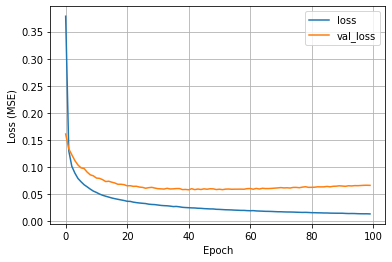

In [258]:
plot_loss(history) # epoch vs loss graph

# Kesimpulan

Hasil terbaik didapatkan pada Model Wider dengan hasil r^2 score 0.7176, dan nilai loss terbaik pada 
Epoch 99
- loss: 0.0295 - val_loss: 0.0650


# Dari Kaggle

Disini saya menemukan cara lain untuk mendapatkan akurasi yang lebih tinggi, sumber : https://www.kaggle.com/lucca9211/ionosphere-classification-accuracy-99-43

In [58]:

# split into input (X) and output (Y) variables

X = dataset.values[1:,0:33].astype(float)
Y = dataset.values[1:,33]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [59]:
# create model
model = Sequential()
model.add(Dense(33, input_dim=33 , activation= 'relu' ))
model.add(Dense(1,  activation= 'sigmoid' ))

In [60]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])

In [61]:
history_kaggle = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=10, verbose=2)

Epoch 1/50
24/24 - 0s - loss: 0.5370 - accuracy: 0.7521 - val_loss: 0.3512 - val_accuracy: 0.9052
Epoch 2/50
24/24 - 0s - loss: 0.2699 - accuracy: 0.8846 - val_loss: 0.0797 - val_accuracy: 0.9655
Epoch 3/50
24/24 - 0s - loss: 0.3505 - accuracy: 0.8248 - val_loss: 0.1008 - val_accuracy: 0.9655
Epoch 4/50
24/24 - 0s - loss: 0.2281 - accuracy: 0.9188 - val_loss: 0.1022 - val_accuracy: 0.9741
Epoch 5/50
24/24 - 0s - loss: 0.1524 - accuracy: 0.9530 - val_loss: 0.0855 - val_accuracy: 0.9828
Epoch 6/50
24/24 - 0s - loss: 0.1919 - accuracy: 0.9316 - val_loss: 0.1298 - val_accuracy: 0.9741
Epoch 7/50
24/24 - 0s - loss: 0.1505 - accuracy: 0.9487 - val_loss: 0.0637 - val_accuracy: 0.9741
Epoch 8/50
24/24 - 0s - loss: 0.1045 - accuracy: 0.9744 - val_loss: 0.1076 - val_accuracy: 0.9741
Epoch 9/50
24/24 - 0s - loss: 0.0934 - accuracy: 0.9701 - val_loss: 0.0809 - val_accuracy: 0.9828
Epoch 10/50
24/24 - 0s - loss: 0.0815 - accuracy: 0.9744 - val_loss: 0.0640 - val_accuracy: 0.9828
Epoch 11/50
24/24 -

In [64]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history_kaggle.history)
history_dataframe['epoch'] = history_kaggle.epoch
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.031199,0.995726,0.065321,0.991379,25
38,0.024935,0.995726,0.065234,0.991379,38
27,0.029598,0.995726,0.053433,0.991379,27
29,0.028365,0.995726,0.050974,0.991379,29
30,0.031299,0.995726,0.050243,0.991379,30
32,0.028571,0.995726,0.055324,0.991379,32
33,0.024242,0.995726,0.053053,0.991379,33
34,0.027417,0.995726,0.054222,0.991379,34
35,0.026649,0.995726,0.061430,0.991379,35
36,0.024781,0.995726,0.065750,0.991379,36


In [62]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9943
accuracy: 99.43%


Dengan cara diatas model tersebut mendapatkan nilai Accuracy terbaik yaitu 99.13% yang didapatkan pada Epoch ke 25 dengan hasil > loss: 0.0321 - accuracy: 0.9957 - val_loss: 0.0474 - val_accuracy: 0.9914